<a href="https://colab.research.google.com/github/XIOZ119/colab/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

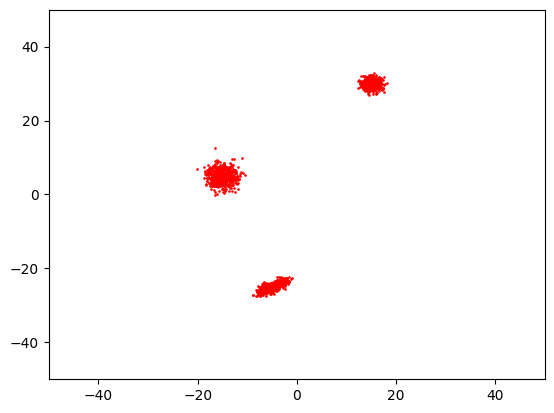

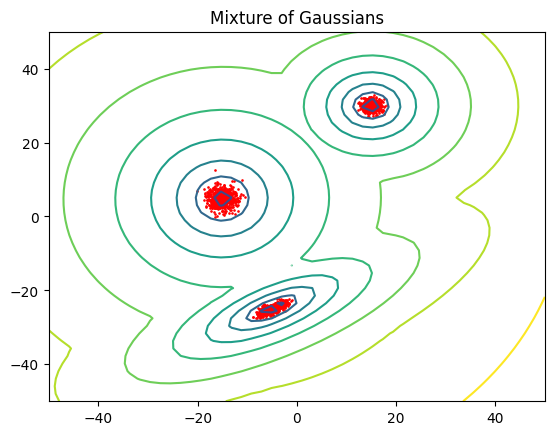

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

# 데이터 생성
n_samples = 600
np.random.seed(0)
# 각각의 클러스터를 정의하는 데이터 생성
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([15, 30])  # 평균을 이동한 가우시안 분포
C1 = np.array([[0., -0.7], [1.5, .7]])
stretched_gaussian1 = np.dot(np.random.randn(n_samples, 2), C1) + np.array([-5, -25])  # 늘어난 가우시안 분포
C2 = np.array([[0.5, 1.7], [-1.5, 0.5]])
stretched_gaussian2 = np.dot(np.random.randn(n_samples, 2), C2) + np.array([-15, 5])  # 늘어난 가우시안 분포
X_train = np.vstack([shifted_gaussian, stretched_gaussian1, stretched_gaussian2])

# 데이터 시각화
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.scatter(X_train[:,0], X_train[:,1], .8, color='r')  # 데이터 산점도 플롯
plt.show()

# 가우시안 혼합 모델 학습
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')  # 3개의 가우시안 모델 사용
clf.fit(X_train)

# 등고선을 이용한 가우시안 혼합 모델 시각화
x = np.linspace(-50., 50.)
y = np.linspace(-50., 50.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)  # 등고선을 위한 점수 계산
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))  # 등고선 플롯
plt.scatter(X_train[:, 0], X_train[:, 1], .8, color='r')  # 데이터 산점도 플롯
plt.title('Mixture of Gaussians')  # 그래프 제목
plt.show()
